In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#import dataset
original_election_data = pd.read_csv("election_train.csv")
demographic_data = pd.read_csv("demographics_train.csv")
original_election_data.count()
#demographic_data

Year      2410
State     2410
County    2410
Office    2410
Party     2410
Votes     2400
dtype: int64

In [80]:
#Task 1 : Reshape from long format to wide format
election_data = pd.pivot_table(original_election_data, index=['Year','State','County', 'Office'], columns=['Party'], values=['Votes']).reset_index()
election_data.columns = election_data.columns.droplevel(1)
election_data.columns = ["Year", "State", "County", "Office", "Democratic Votes", "Republican Votes"]
election_data.count()
#, aggfunc=np.sum

Year                1205
State               1205
County              1205
Office              1205
Democratic Votes    1200
Republican Votes    1200
dtype: int64

In [82]:
#election_data['County'].replace({'County', ''}, inplace=True, regex=False )
election_data['County'] = election_data['County'].str.replace('County', '')
election_data['County'] = election_data['County'].str.strip()
election_data['State'] = election_data['State'].str.strip()
#election_data
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
election_data = election_data.replace({"State":states})
demographic_data['State'] = demographic_data['State'].str.strip()
demographic_data['County'] = demographic_data['County'].str.strip()

demographic_data['State'] = demographic_data['State'].str.upper()
election_data['State'] = election_data['State'].str.upper()
election_data['County'] = election_data['County'].str.upper()
demographic_data['County'] = demographic_data['County'].str.upper()
election_data
#demographic_data
election_data.count()

Year                1205
State               1205
County              1205
Office              1205
Democratic Votes    1200
Republican Votes    1200
dtype: int64

In [83]:
#Task 2
merged_data = pd.merge(election_data, demographic_data, how='inner', on=['State','County'])
#merged_data[merged_data['County']==""]
#merged_data.dtypes
#merged_data.isnull().sum()
merged_data.count()

Year                                     1200
State                                    1200
County                                   1200
Office                                   1200
Democratic Votes                         1195
Republican Votes                         1195
FIPS                                     1200
Total Population                         1200
Citizen Voting-Age Population            1200
Percent White, not Hispanic or Latino    1200
Percent Black, not Hispanic or Latino    1200
Percent Hispanic or Latino               1200
Percent Foreign Born                     1200
Percent Female                           1200
Percent Age 29 and Under                 1200
Percent Age 65 and Older                 1200
Median Household Income                  1200
Percent Unemployed                       1200
Percent Less than High School Degree     1200
Percent Less than Bachelor's Degree      1200
Percent Rural                            1200
dtype: int64

In [84]:
#Task 5
merged_data['Party'] = np.where(merged_data['Democratic Votes'] > merged_data['Republican Votes'], 1, 0)
#merged_data[['Democratic Votes', 'Republican Votes', 'Party']]
merged_data.head()

,Year,State,County,Office,Democratic Votes,Republican Votes,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino",...,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
0,2018,ARIZONA,APACHE,US Senator,16298.0,7810.0,4001,72346,0,18.571863,...,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
1,2018,ARIZONA,COCHISE,US Senator,17383.0,26929.0,4003,128177,92915,56.299492,...,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
2,2018,ARIZONA,COCONINO,US Senator,34240.0,19249.0,4005,138064,104265,54.619597,...,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
3,2018,ARIZONA,GILA,US Senator,7643.0,12180.0,4007,53179,0,63.222325,...,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,2018,ARIZONA,GRAHAM,US Senator,3368.0,6870.0,4009,37529,0,51.461536,...,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0


In [85]:
#Task 6(TODO)
demo_mean = merged_data.groupby(['Party']).get_group(1).mean()
repub_mean = merged_data.groupby(['Party']).get_group(0).mean()
demo_mean['Total Population'] > repub_mean['Total Population']

True

In [86]:
#Task 7(TODO)
demo_mean = merged_data.groupby(['Party']).get_group(1).mean()
repub_mean = merged_data.groupby(['Party']).get_group(0).mean()
demo_mean['Median Household Income'] > repub_mean['Median Household Income']

True

In [87]:
pd.options.mode.chained_assignment = None  # default='warn'
age_data = merged_data[['Percent Age 29 and Under','Percent Age 65 and Older','Party']]
age_data['Percent Age 29 to 65'] = 100 - age_data['Percent Age 29 and Under'] - age_data['Percent Age 65 and Older']
#list(age_data.columns.values)
age_data = age_data[['Percent Age 29 and Under','Percent Age 29 to 65','Percent Age 65 and Older','Party']]
#age_data.groupby('Party').describe().transpose()

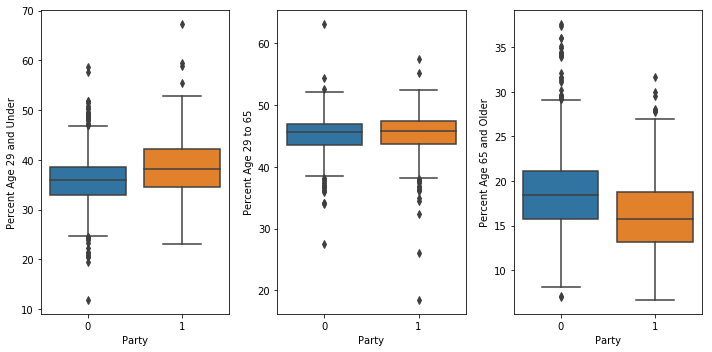

In [88]:
num_columns = len(age_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = age_data.columns[i], data = age_data, orient = 'v', ax = axes[i])
plt.tight_layout()

In [89]:
gender_data = merged_data[['Percent Female', 'Party']]
gender_data['Percent Male'] = 100 - gender_data['Percent Female']
gender_data = gender_data[['Percent Female','Percent Male','Party']]

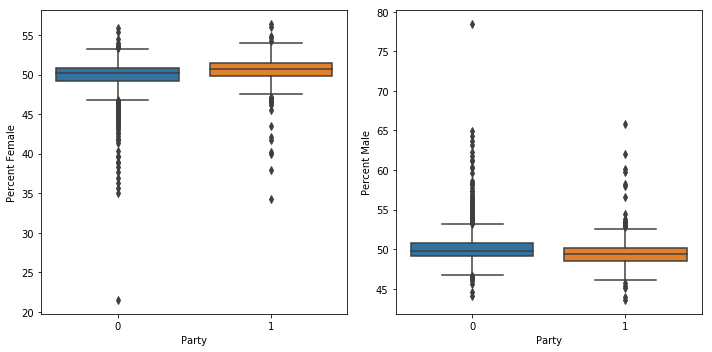

In [90]:
num_columns = len(gender_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = gender_data.columns[i], data = gender_data, orient = 'v', ax = axes[i])
plt.tight_layout()

In [91]:
race_data = merged_data[['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Party']]

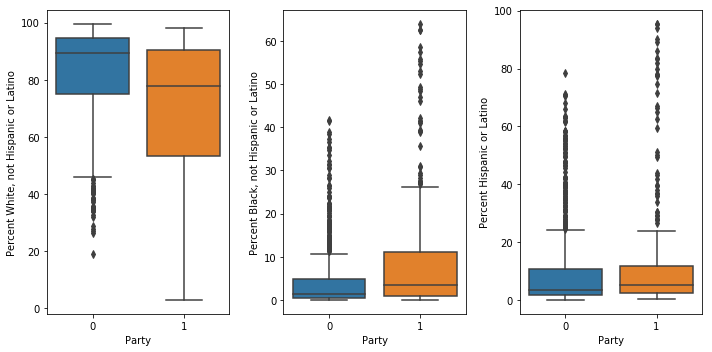

In [92]:
num_columns = len(race_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = race_data.columns[i], data = race_data, orient = 'v', ax = axes[i])
plt.tight_layout()

In [93]:
ethnic_data = merged_data[['Percent Foreign Born','Party']]
ethnic_data['Percent Not Foreign Born'] = 100 - ethnic_data['Percent Foreign Born']
ethnic_data = ethnic_data[['Percent Foreign Born','Percent Not Foreign Born','Party']]

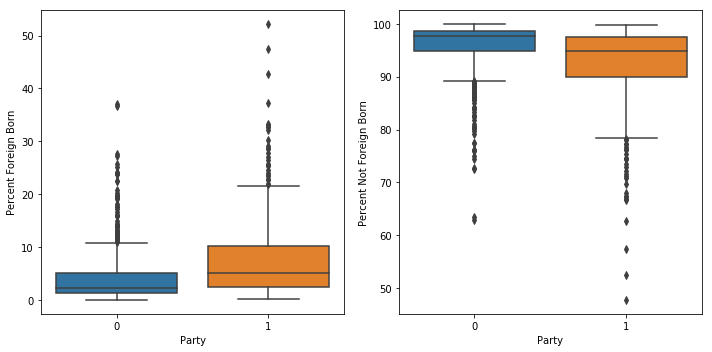

In [94]:
num_columns = len(ethnic_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = ethnic_data.columns[i], data = ethnic_data, orient = 'v', ax = axes[i])
plt.tight_layout()